## Date: 04/02/2023

In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
print("sklearn version: ", sklearn.__version__)
print("matplotlib version: ", matplotlib.__version__)
# print("seaborn version: ", sns.__version__)


# numpy version:  1.24.1
# pandas version:  1.5.2
# sklearn version:  1.2.1
# matplotlib version:  3.6.3


numpy version:  1.24.1
pandas version:  1.5.2
sklearn version:  1.2.1
matplotlib version:  3.6.3


In [4]:
data = pd.read_csv('Datasets/Social_Network_Ads.csv')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = data.iloc[:, 2:-1].values

y = data.iloc[:, -1].values

In [6]:
X.shape

(400, 2)

In [7]:
y.shape

(400,)

In [9]:
X[:10]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]], dtype=int64)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [12]:
X_train.shape

(320, 2)

In [13]:
X_test.shape

(80, 2)

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X=X_train)

In [18]:
X_test = scaler.transform(X=X_test)


In [17]:
X_train[:10]

array([[-1.10884076, -0.57813283],
       [-0.34205731,  0.00446048],
       [ 0.42472615,  0.52879446],
       [ 0.42472615,  0.93660977],
       [-1.68392834,  0.4122758 ],
       [ 0.9039658 , -1.10246681],
       [ 0.23303028, -0.4324845 ],
       [-0.24620937, -1.42289313],
       [ 0.32887821,  0.20836814],
       [-1.20468869,  0.44140546]])

In [19]:
# 1st method to select the k value

np.sqrt(X_train.shape[0])

17.88854381999832

In [20]:
k = 17

In [21]:
knn = KNeighborsClassifier(n_neighbors=k)

In [22]:
# Train our model

knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_neighbors=17)

In [23]:
y_pred = knn.predict(X=X_test)

In [24]:
y_pred.shape

(80,)

In [25]:
y_test.shape

(80,)

In [26]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9

In [28]:
c_matric = confusion_matrix(y_true=y_test, y_pred=y_pred)
c_matric

array([[49,  4],
       [ 4, 23]], dtype=int64)

In [29]:
c_matric[0][0]

49

## Effect of K on Training Error rate and Validation Error rate

In [33]:
train_error = []
test_error = []

for i in range(1, 26):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X=X_train, y=y_train)
    x = confusion_matrix(y_true=y_train, y_pred=knn_model.predict(X=X_train))
    y = confusion_matrix(y_true=y_test, y_pred=knn_model.predict(X=X_test))
    train_error.append((x[0][1] + x[1][0]) / x.sum())
    test_error.append((y[0][1] + y[1][0]) / y.sum())

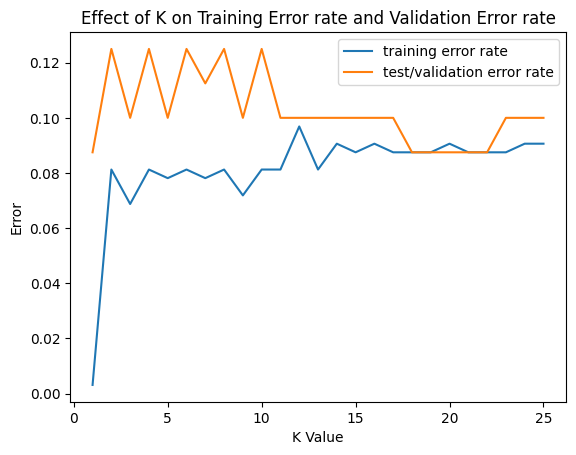

In [34]:
plt.plot(range(1,26), train_error, label='training error rate')
plt.plot(range(1,26), test_error, label='test/validation error rate')
plt.title(label="Effect of K on Training Error rate and Validation Error rate")
plt.xlabel(xlabel='K Value')
plt.ylabel(ylabel='Error')
plt.legend()
plt.show()

In [38]:
knn_model2 = KNeighborsClassifier(n_neighbors=17)

knn_model2.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_neighbors=13)

In [39]:
y_pred = knn.predict(X=X_test)

In [40]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9

In [41]:
def predict_output():
    age = int(input("Enter the age: "))
    salary = int(input("Enter the salary: "))
    
    X_new = np.array([[age],[salary]]).reshape(1,2)
    
    X_new = scaler.transform(X=X_new)
    
    if knn.predict(X_new)[0] == 0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [42]:
predict_output()

Enter the age: 31
Enter the salary: 30000


'Will not purchase'

### Few Observations

In [275]:
# 1. Hyperparameters

# 2. Method to choose K

# ---->Method 1 K=17
# ---->Method 2 K=11

## 1. Decision Boundary for Knn

### 1. What is Decision Boundary

<p>In a classification problem with two or more classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two or more sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.</p>

<img src='https://aws1.discourse-cdn.com/business5/uploads/julialang/original/2X/f/f11eb7f942661dd020c059a3a9718305fd550c41.png'>

### Important Points
<ol>
    <li>We can draw decision boundary for all the classification algorithms including Neural networks</li>
    <li>Decision boundary can be both linear(as in the case of SVM) or non-linear(as in the case of Decision tree classifier or Knn) </li>
    <li>Decision boundaries are not always clear cut. That is, the transition from one class in the feature space to another is not discontinuous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous.</li>
    <li>For higher dimension problems the decision boundary acts as a hyperplane(for linear ones)</li>
</ol>

## 2. Vornoi Diagram

<p>In mathematics, a Voronoi diagram is a partitioning of a plane into regions based on distance to points in a specific subset of the plane.</p>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Euclidean_Voronoi_diagram.svg/220px-Euclidean_Voronoi_diagram.svg.png'>

## 3. Steps to plot Decision Boundary for Knn(Assuming 2 input cols)
<ol>
    <li>Train the classifier on the training set.</li>
    <li>Create a uniform grid(with the help of Numpy Meshgrids) of points that densely cover the region of input space containing the training set.</li>
    <li>Classify each point on the grid. Store the results in an array A, where Aij contains the predicted class for the point at row i, column j on the grid.</li>
    <li>Plot the array as an image, where each pixel corresponds to a grid point and its color represents the predicted class. The decision boundary can be seen as contours where the image changes color.</li>
    <li>Finally print out the training data with their respective color on the same contour</li>
</ol>

### Step 2: Creating a Meshgrid

In [43]:
# this is for age column. we create points for x-cordinate
x = np.arange(start=X_train[:, 0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
# this is for salary column. we create points for y-cordinate
y = np.arange(start=X_train[:, 1].min()-1, stop=X_train[:,1].max()+1, step=0.01)

In [45]:
x[:10]

array([-2.87562421, -2.86562421, -2.85562421, -2.84562421, -2.83562421,
       -2.82562421, -2.81562421, -2.80562421, -2.79562421, -2.78562421])

In [46]:
y[:10]

array([-2.65593045, -2.64593045, -2.63593045, -2.62593045, -2.61593045,
       -2.60593045, -2.59593045, -2.58593045, -2.57593045, -2.56593045])

In [47]:
XX, YY = np.meshgrid(x, y)

In [48]:
XX.shape

(594, 603)

In [49]:
YY.shape

(594, 603)

In [50]:
XX

array([[-2.87562421, -2.86562421, -2.85562421, ...,  3.12437579,
         3.13437579,  3.14437579],
       [-2.87562421, -2.86562421, -2.85562421, ...,  3.12437579,
         3.13437579,  3.14437579],
       [-2.87562421, -2.86562421, -2.85562421, ...,  3.12437579,
         3.13437579,  3.14437579],
       ...,
       [-2.87562421, -2.86562421, -2.85562421, ...,  3.12437579,
         3.13437579,  3.14437579],
       [-2.87562421, -2.86562421, -2.85562421, ...,  3.12437579,
         3.13437579,  3.14437579],
       [-2.87562421, -2.86562421, -2.85562421, ...,  3.12437579,
         3.13437579,  3.14437579]])

In [51]:
YY

array([[-2.65593045, -2.65593045, -2.65593045, ..., -2.65593045,
        -2.65593045, -2.65593045],
       [-2.64593045, -2.64593045, -2.64593045, ..., -2.64593045,
        -2.64593045, -2.64593045],
       [-2.63593045, -2.63593045, -2.63593045, ..., -2.63593045,
        -2.63593045, -2.63593045],
       ...,
       [ 3.25406955,  3.25406955,  3.25406955, ...,  3.25406955,
         3.25406955,  3.25406955],
       [ 3.26406955,  3.26406955,  3.26406955, ...,  3.26406955,
         3.26406955,  3.26406955],
       [ 3.27406955,  3.27406955,  3.27406955, ...,  3.27406955,
         3.27406955,  3.27406955]])

### Step 3: Classifiying every point on the meshgrid

In [54]:
# Demo test

arr = np.array([[1,2,3,4],[5,6,7,8]])
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [55]:
arr.T

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [52]:
np.array([XX.ravel(), YY.ravel()])

array([[-2.87562421, -2.86562421, -2.85562421, ...,  3.12437579,
         3.13437579,  3.14437579],
       [-2.65593045, -2.65593045, -2.65593045, ...,  3.27406955,
         3.27406955,  3.27406955]])

In [53]:
np.array([XX.ravel(), YY.ravel()]).T

array([[-2.87562421, -2.65593045],
       [-2.86562421, -2.65593045],
       [-2.85562421, -2.65593045],
       ...,
       [ 3.12437579,  3.27406955],
       [ 3.13437579,  3.27406955],
       [ 3.14437579,  3.27406955]])

In [56]:
input_array = np.array([XX.ravel(), YY.ravel()]).T

labels = knn.predict(X=input_array)

In [57]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
labels.shape

(358182,)

### Step 4: Plotting the array as an image

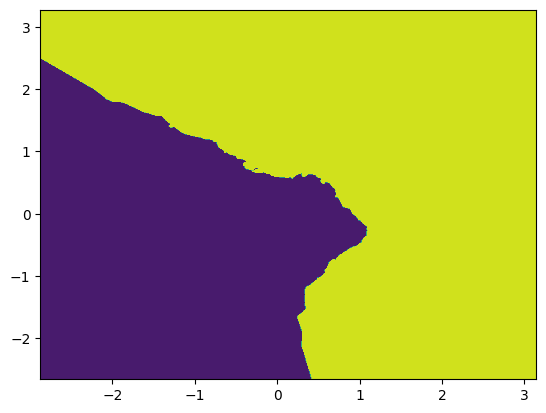

In [59]:
plt.contourf(XX, YY, labels.reshape(XX.shape))
plt.show()

### Step 5: Plotting all the training data on the plot

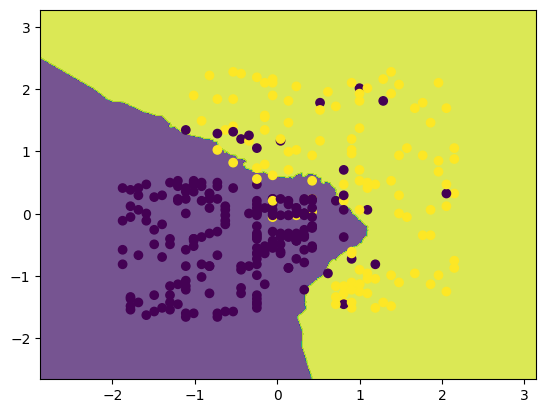

In [60]:
plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

## Effect of K on Decision Boundary

In [62]:
def k_effect(data, k):
    data=pd.read_csv('Datasets/{}'.format(data))
    
    X=data.iloc[:, :2].values
    y=data.iloc[:, -1].values
    
    knn=KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X,y)
    
    a = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY = np.meshgrid(a,b)
    
    input_array = np.array([XX.ravel(),YY.ravel()]).T

    labels = knn.predict(input_array)
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:, 0],X[:,1], c=y)
    plt.show()

### Dataset 1: Ushape

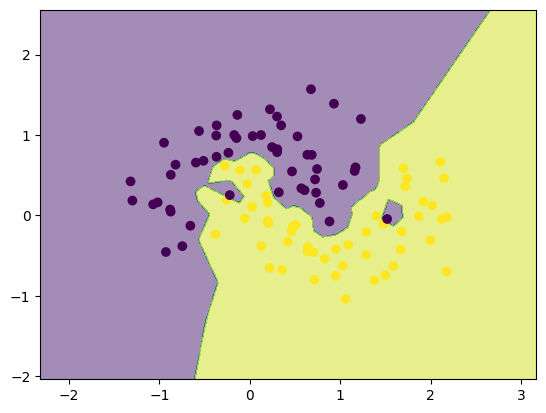

In [64]:
k_effect('ushape.csv', 1)

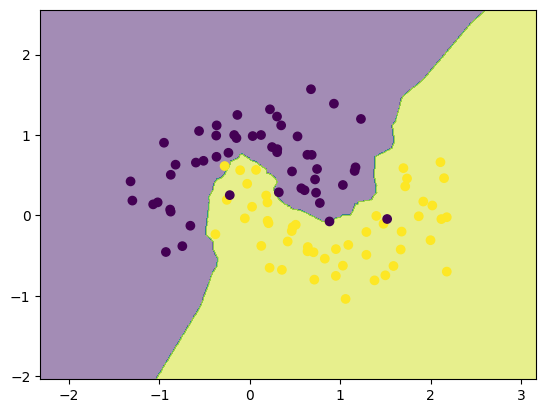

In [65]:
k_effect('ushape.csv', 5)

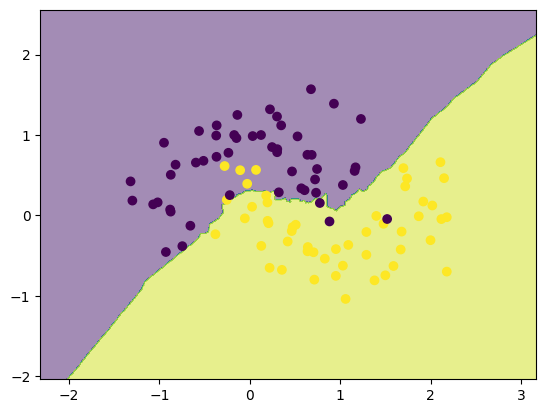

In [67]:
k_effect('ushape.csv', 30)

### Dataset 2: Linear Seperation

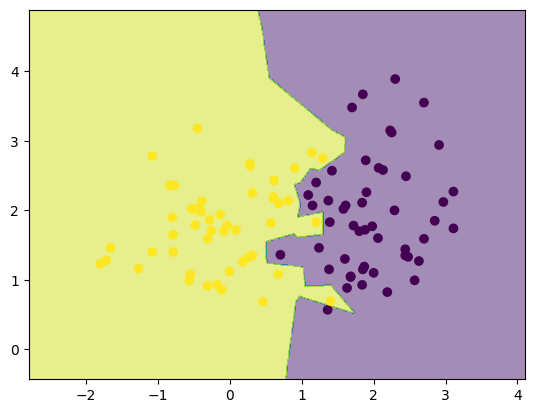

In [68]:
k_effect('linearsep.csv', 1)

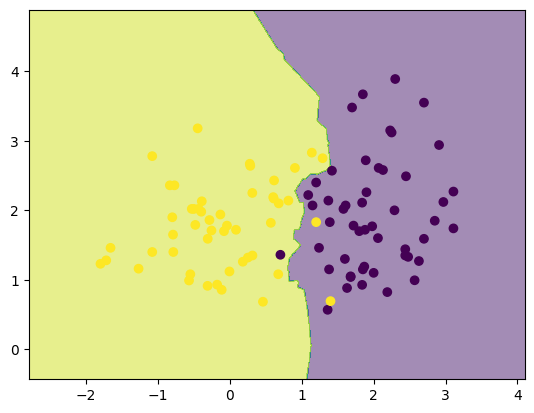

In [69]:
k_effect('linearsep.csv', 5)

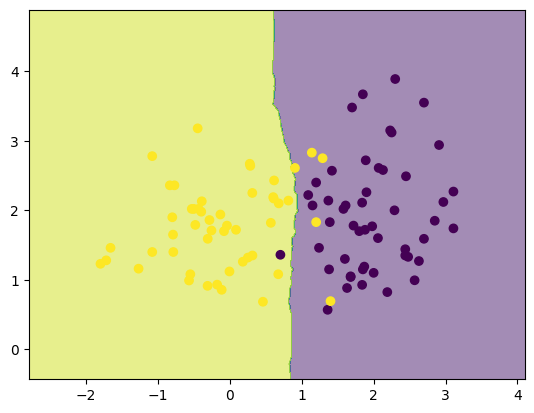

In [70]:
k_effect('linearsep.csv',30)

### Dataset 3: Concentric Circles

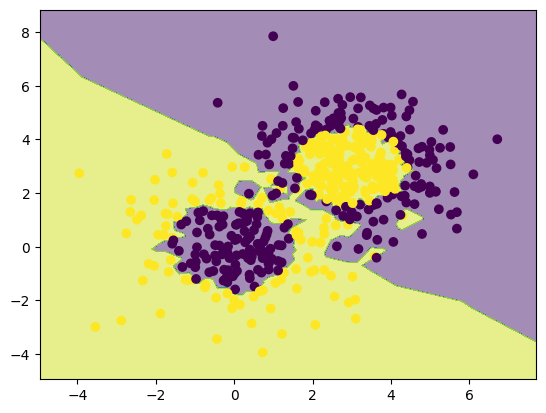

In [71]:
k_effect('concertriccir2.csv', 1)

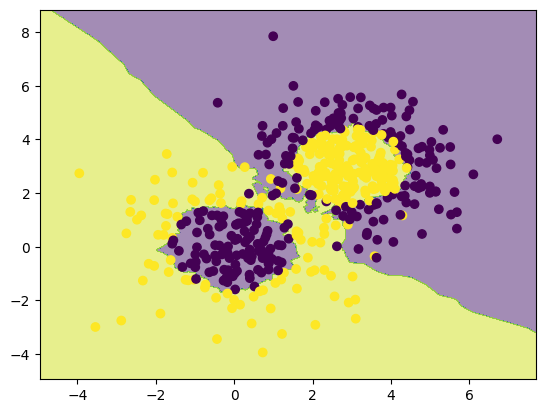

In [72]:
k_effect('concertriccir2.csv', 5)

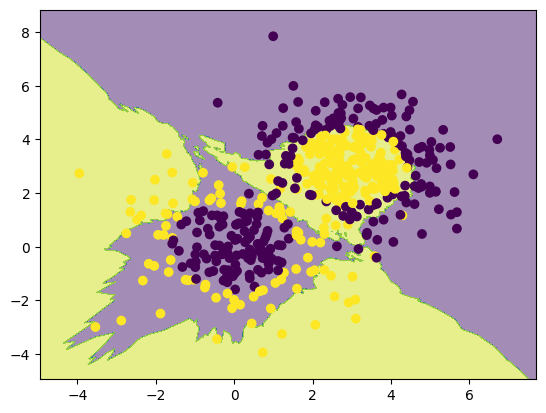

In [73]:
k_effect('concertriccir2.csv', 50)

### Dataset 4: XOR

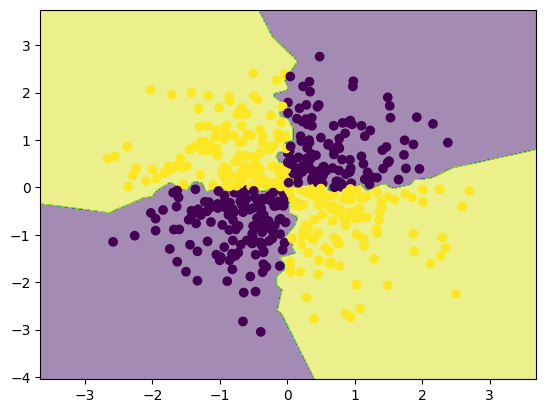

In [74]:
k_effect('xor.csv', 1)

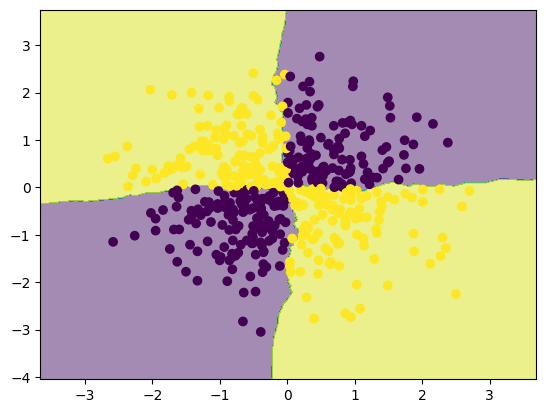

In [75]:
k_effect('xor.csv', 30)

### Dataset 5: Two Spirals

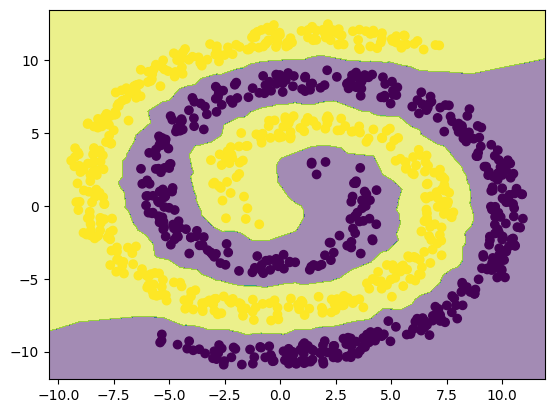

In [76]:
k_effect('twoSpirals.csv', 1)

## Conclusion

1. For smaller values of K(=1) the model generally overfits and shows High Variance.
2. For higher values of K(=n, where n is the no. of rows in training set), the model underfits and shows High Bias
3. As we increase the value of K the smoothness of Decision Boundary/Surface increases